Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library(tidymodels)

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.1     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tibble       3.3.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         1.3.0
✔ modeldata    1.5.1     ✔ workflows    1.2.0
✔ parsnip      1.3.2     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 10, 4, 10, 1, 3, 8, 1, 13, 5, 5, 3, 6, 4, …
$ Glucose                  <dbl> 89, 115, 110, 139, 103, 126, 99, 97, 145, 117…
$ BloodPressure            <dbl> 66, 0, 92, 80, 30, 88, 84, 66, 82, 92, 75, 58…
$ SkinThickness            <dbl> 23, 0, 0, 0, 38, 41, 0, 15, 19, 0, 26, 11, 0,…
$ Insulin                  <dbl> 94, 0, 0, 0, 83, 235, 0, 140, 110, 0, 0, 54, …
$ BMI                      <dbl> 28.1, 35.3, 37.6, 27.1, 43.3, 39.3, 35.4, 23.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.134, 0.191, 1.441, 0.183, 0.704, 0.3…
$ Age                      <dbl> 21, 29, 30, 57, 33, 27, 50, 22, 57, 38, 60, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The 'Outcome' variable is suitable as the outcome in a logistic regression because it has been factored to have two levels (0 and 1) indicating that the person either has or does not have diabetes.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BMI         | Body mass index (weight in kg/(height in m)^2) |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

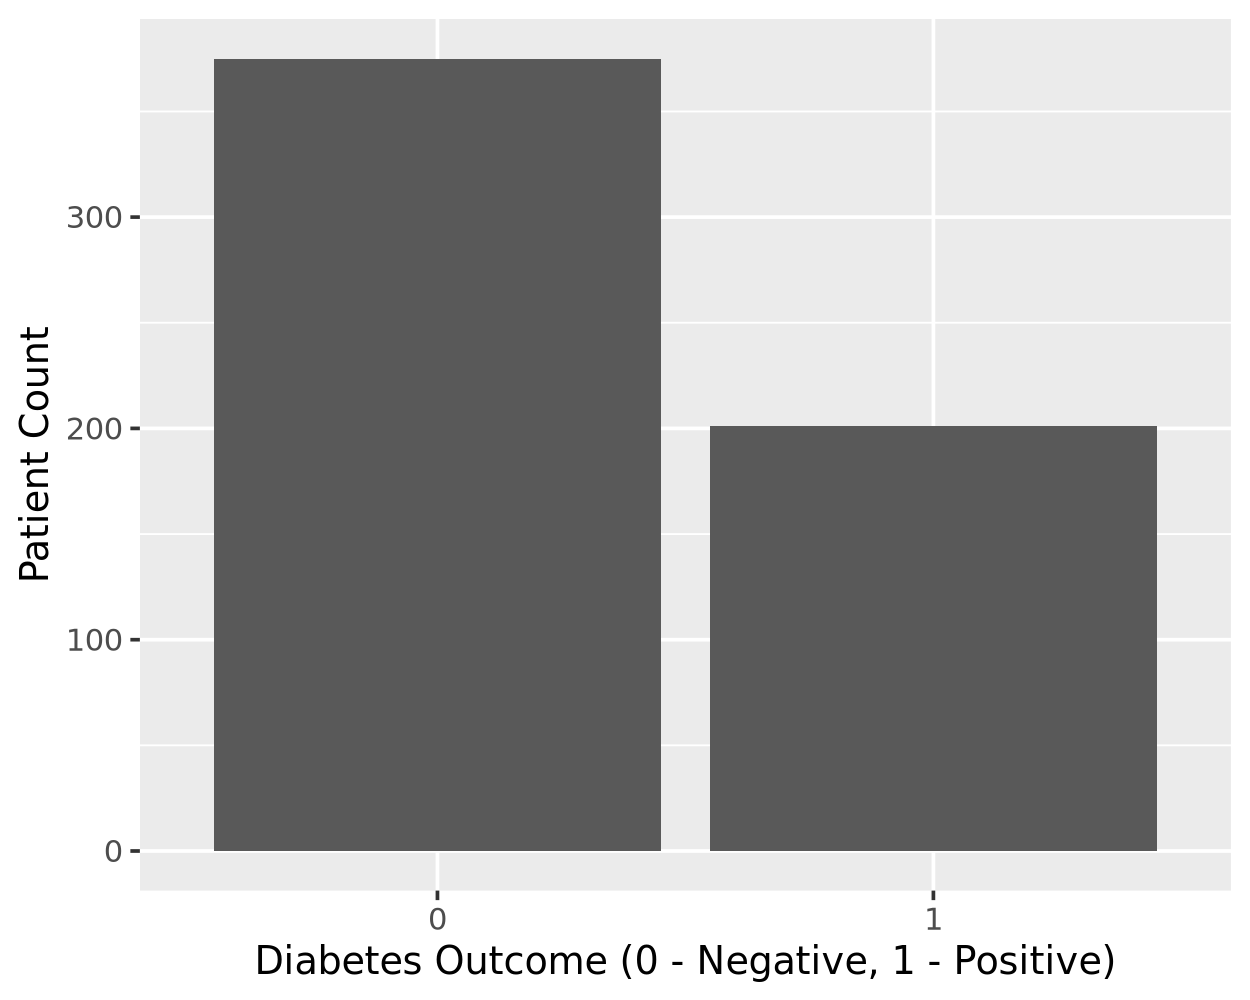

In [4]:
ggplot(diabetes_train, aes(x= Outcome)) +
    geom_bar() +
    labs(x = "Diabetes Outcome (0 - Negative, 1 - Positive)", y = "Patient Count")

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

The data is not balanced between diabetic and non-diabetic patients.



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,115.0
0,BMI,35.3
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

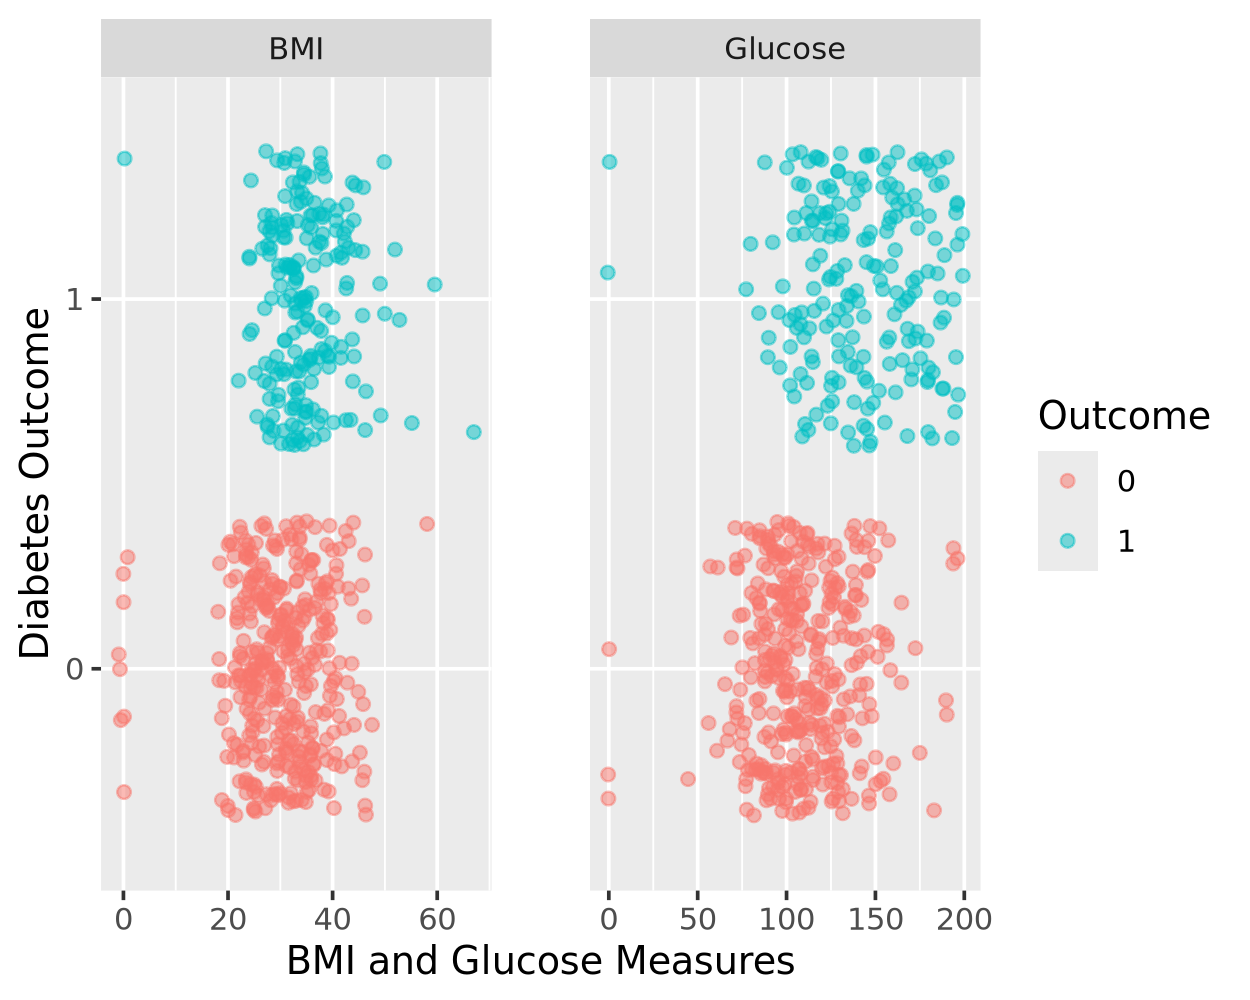

In [6]:
ggplot(plot_df, aes(x = value, y = Outcome, color = Outcome)) +
    geom_jitter(alpha = 0.5, width = 1) +
    facet_wrap(~name, ncol = 2, scales = "free_x") +
    labs(x= "BMI and Glucose Measures", y= "Diabetes Outcome") +
    theme(panel.spacing = unit(1, "cm"))

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

Without the scales = 'free_x' argument, the program chooses the larger of the two x-value ranges (in this case for Glucose concentration) and applies it to both graphs, which compresses the visual spread of the BMI measurements.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [7]:
diabetes_rec <- recipe(Outcome ~ BMI + Glucose, data = diabetes_train) |>
    step_naomit(everything()) |>
    prep()

diabetes_mod <- logistic_reg() |>
    set_engine("glm")

diabetes_mod_fit <- diabetes_mod |> 
    fit(Outcome ~ BMI + Glucose, data = juice(diabetes_rec))

tidy(diabetes_mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.74148944,0.719725255,-10.756173,5.542425e-27
BMI,0.07942952,0.015594382,5.093470,3.515682e-07
Glucose,0.03615816,0.003797224,9.522264,1.694466e-21


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [9]:
library(broom)

diabetes_test_wPred <- augment(diabetes_mod_fit, new_data= diabetes_test, type.predict= "response")

summary(diabetes_test_wPred)

 .pred_class    .pred_0           .pred_1         Pregnancies    
 0:141       Min.   :0.05412   Min.   :0.01899   Min.   : 0.000  
 1: 51       1st Qu.:0.47258   1st Qu.:0.14755   1st Qu.: 1.000  
             Median :0.73464   Median :0.26536   Median : 3.000  
             Mean   :0.64946   Mean   :0.35054   Mean   : 4.411  
             3rd Qu.:0.85245   3rd Qu.:0.52742   3rd Qu.: 7.000  
             Max.   :0.98101   Max.   :0.94588   Max.   :17.000  
    Glucose      BloodPressure    SkinThickness      Insulin      
 Min.   : 57.0   Min.   :  0.00   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:100.0   1st Qu.: 64.00   1st Qu.: 0.00   1st Qu.:  0.00  
 Median :116.0   Median : 72.00   Median :23.50   Median : 40.50  
 Mean   :121.3   Mean   : 69.32   Mean   :21.69   Mean   : 83.98  
 3rd Qu.:138.2   3rd Qu.: 78.00   3rd Qu.:32.00   3rd Qu.:132.75  
 Max.   :197.0   Max.   :106.00   Max.   :99.00   Max.   :680.00  
      BMI        DiabetesPedigreeFunction      Age        Outcome
 Mi

Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [10]:
diabetes_test_wPred = augment(diabetes_mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 109  32
         1  16  35

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:** 67 patients had diabetes in the data, and of those, 35 were correctly diagnosed by the model. There were 16 false-positives where the model predicted the patient had diabetes but did not, while there were twice as many false-negatives. These false-negatives were similar in quantity to the true-positives, but all three of those categories were dwarfed by the true-negatives at 109.